In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
sns.set(style="whitegrid")

In [52]:
df1 = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\COVID\covid_confirmed_usafacts.csv')
df2 = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\COVID\covid_deaths_usafacts.csv')
df3 = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\COVID\COVID19_CDC_Vaccination_CSV_Download.csv')

# Data Cleaning

In [53]:
df1 = df1.melt(id_vars=['countyFIPS',
                 'County Name',
                 'State',
                 'StateFIPS'], 
        var_name="Date", 
        value_name="Confirmed Cases")

In [54]:
df2 = df2.melt(id_vars=['countyFIPS',
                 'County Name',
                 'State',
                 'StateFIPS'], 
        var_name="Date", 
        value_name="Confirmed Cases")

In [55]:
df = pd.merge(df1,df2,how='inner',left_on=['countyFIPS','Date','StateFIPS'],right_on=['countyFIPS','Date','StateFIPS'])

In [56]:
df = df[['countyFIPS','County Name_x','State_x','Date','Confirmed Cases_x','Confirmed Cases_y']]

In [57]:
df.rename({'County Name_x': 'county_name', 'State_x': 'state','Confirmed Cases_x': 'confirmed_cases','Confirmed Cases_y': 'confirmed_deaths'}, axis=1, inplace=True)

In [58]:
df['Date'] = pd.to_datetime(df['Date'])

In [59]:
df = df.drop_duplicates()

In [60]:
df_agg = df[['state','Date','confirmed_cases']].groupby(['state','Date'],as_index=False).sum(['confirmed_cases','confirmed_deaths'])

In [74]:
df_st = df_agg.sort_values(by=['state', 'Date'])
#df_st['confirmed_cases']=df_st['confirmed_cases'].astype('int')
#df_st['Date']=df_st['Date'].astype('object')
df_st['new_cases']=df_st.groupby(['state'])[['confirmed_cases']].diff().fillna(0)
df_st['new_cases']=abs(df_st['new_cases'])

# State

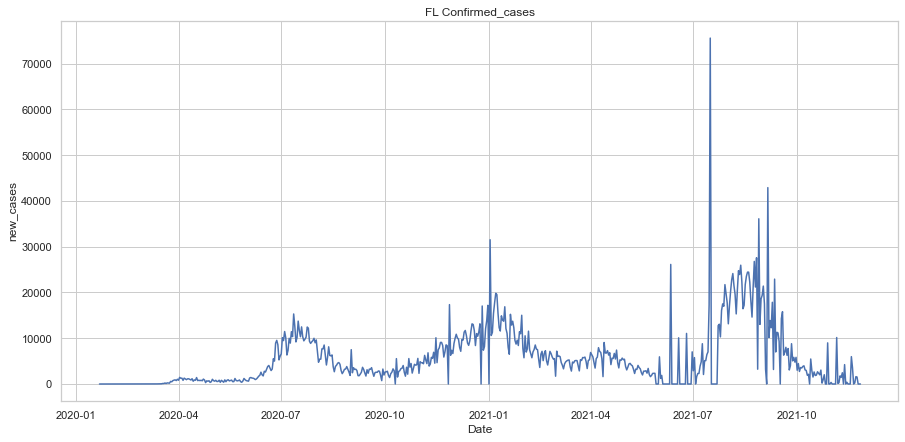

In [77]:
x='FL'
plt.figure(figsize=(15,7))
ax = sns.lineplot(x='Date', y= "new_cases", data=df_st[df_st['state']==x])
ax.set_title(x +' Confirmed_cases')
plt.show()

,county_name,state,Date,countyFIPS,confirmed_cases,confirmed_deaths,cumulative_deaths,cumulative_cases
0,Statewide Unallocated,AK,2020-01-22,0,0,0,0,0
1,Statewide Unallocated,AK,2020-01-23,0,0,0,0,0
2,Statewide Unallocated,AK,2020-01-24,0,0,0,0,0
3,Statewide Unallocated,AK,2020-01-25,0,0,0,0,0
4,Statewide Unallocated,AK,2020-01-26,0,0,0,0,0
...,...,...,...,...,...,...,...,...
34420,Statewide Unallocated,WY,2021-11-22,0,0,0,0,0
34421,Statewide Unallocated,WY,2021-11-23,0,0,0,0,0
34422,Statewide Unallocated,WY,2021-11-24,0,0,0,0,0
34423,Statewide Unallocated,WY,2021-11-25,0,0,0,0,0


In [304]:
df=df1

In [308]:
df.rename({'County Name': 'county_name', 'State': 'state','Confirmed Cases': 'confirmed_cases'}, axis=1, inplace=True)

In [309]:
df['cumulative_cases'] = df[['state', 'Date','confirmed_cases']].groupby(['state', 'Date']).cumsum()

In [310]:
df_st = df[df['county_name']=='Statewide Unallocated']

In [311]:
df_st = df_st.groupby(['county_name','state','Date'],as_index=False).sum(['confirmed_cases','confirmed_deaths'])
df_st.head()

,county_name,state,Date,countyFIPS,StateFIPS,confirmed_cases,cumulative_cases
0,Statewide Unallocated,AK,2020-01-22,0,2,0,0
1,Statewide Unallocated,AK,2020-01-23,0,2,0,0
2,Statewide Unallocated,AK,2020-01-24,0,2,0,0
3,Statewide Unallocated,AK,2020-01-25,0,2,0,0
4,Statewide Unallocated,AK,2020-01-26,0,2,0,0


In [312]:
df_st['cumulative_cases'] = df_st[['state', 'Date','confirmed_cases']].groupby(['state', 'Date']).cumsum()

In [314]:
df_st.shape

(34425, 7)

In [315]:
df.county_name.values

array(['Statewide Unallocated', 'Autauga County ', 'Baldwin County ', ...,
       'Uinta County ', 'Washakie County ', 'Weston County '],
      dtype=object)

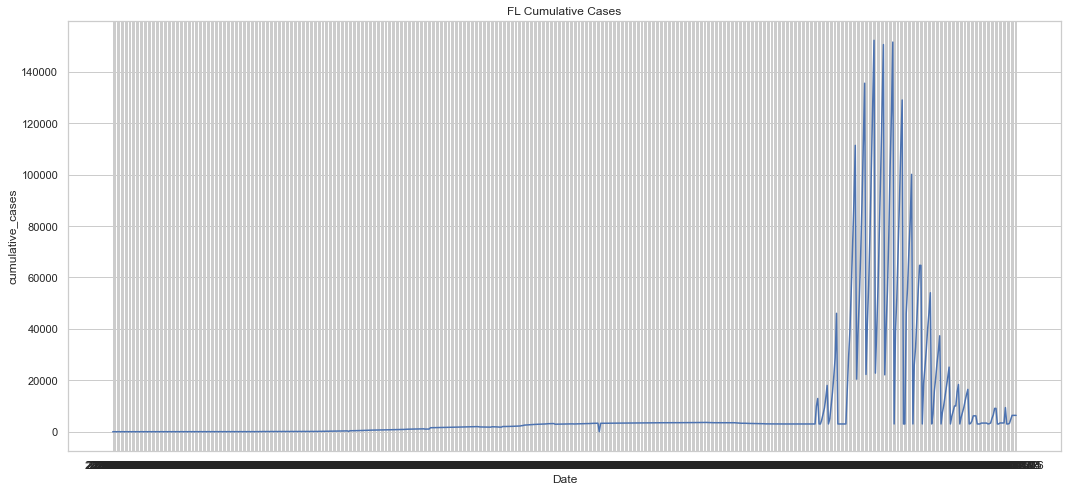

In [316]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(x='Date', y= "cumulative_cases", data=df_st[df_st['state']==x])
ax.set_title(str(x).upper() + ' Cumulative Cases')

plt.tight_layout()
plt.show()

In [317]:
df_st[(df_st['Date']>'2021-11-20') & (df_st['state']=='FL')]

,county_name,state,Date,countyFIPS,StateFIPS,confirmed_cases,cumulative_cases
6744,Statewide Unallocated,FL,2021-11-21,0,12,3237,3237
6745,Statewide Unallocated,FL,2021-11-22,0,12,4842,4842
6746,Statewide Unallocated,FL,2021-11-23,0,12,6365,6365
6747,Statewide Unallocated,FL,2021-11-24,0,12,6365,6365
6748,Statewide Unallocated,FL,2021-11-25,0,12,6365,6365
6749,Statewide Unallocated,FL,2021-11-26,0,12,6365,6365


In [326]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [327]:
df1[(df1['Date']>'2021-11-20') & (df1['State']=='FL') & (df1['County Name']=='Statewide Unallocated')]

,countyFIPS,County Name,State,StateFIPS,Date,Confirmed Cases
2136446,0,Statewide Unallocated,FL,12,2021-11-21,3237
2139639,0,Statewide Unallocated,FL,12,2021-11-22,4842
2142832,0,Statewide Unallocated,FL,12,2021-11-23,6365
2146025,0,Statewide Unallocated,FL,12,2021-11-24,6365
2149218,0,Statewide Unallocated,FL,12,2021-11-25,6365
2152411,0,Statewide Unallocated,FL,12,2021-11-26,6365


In [321]:
df1

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,10423,10439,10457,10457,10457,10477,10495,10508,10512,10512
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,37914,37940,37959,37959,37959,38000,38014,38042,38061,38061
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,3655,3659,3660,3660,3660,3688,3690,3691,3691,3691
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,4325,4328,4333,4333,4333,4337,4338,4339,4340,4340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,7965,7994,8007,8007,8007,8007,8007,8064,8064,8064
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,5336,5344,5350,5350,5350,5350,5350,5366,5366,5366
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,3985,3996,4005,4005,4005,4005,4005,4024,4024,4024
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,1822,1821,1823,1823,1823,1823,1823,1845,1845,1845
